Team

> Merna Tamer   -   Kareem Sobhi   -   Youssef Osama

#Packages used

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix ,classification_report,precision_score, recall_score ,f1_score,auc 
from sklearn.svm import SVC 
import plotly.express as px
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import warnings
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.cm as mcm
import operator as o
warnings.filterwarnings('ignore')
import PIL
from PIL import Image
import requests
import os
from os import listdir
from os.path import isfile, join
from google.colab import files
from google.colab import drive
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pywt
import cv2
from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from sklearn.metrics import confusion_matrix, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.preprocessing import normalize

#Data Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##LOAD DATA & PREPROCESSING

In [4]:
data__drusen_dir='/content/drive/MyDrive/Image-Retinal Classification/Drusen'
data_dir_root='/content/drive/MyDrive/Image-Retinal Classification/'
data_dir=[data_dir_root+'Drusen',data_dir_root+'Exudate',data_dir_root+'Normal']
new_size = (224, 224)

processed_images_drusen=[]
processed_images_exudate=[]
processed_images_normal=[]
directory=0
for dir in data_dir:
  processed_images=[]
  i=0
  directory+=1
  for filename in os.listdir(dir):
        image = Image.open(os.path.join(dir, filename))
        # Resize the image with bilinear interpolation
        resized_image = image.resize(new_size, resample=Image.BILINEAR)

        # turn the image into an array
        image_array = np.array(resized_image)

        # split the image into the three channels R,G,B
        red_channel = image_array[:,:,0]
        green_channel = image_array[:,:,1]
        blue_channel = image_array[:,:,2]

        # normalize the green channel using standardization
        mean = np.mean(green_channel)
        std = np.std(green_channel)
        normalized= (green_channel- mean) / std

        # rescale the image intensities to 0-255 
        scaled = 255 * (normalized - np.min(normalized)) / (np.max(normalized) - np.min(normalized))
        image_array[:,:,1] = scaled
        preprocessed_image = Image.fromarray(image_array)
        if directory==1:
          i=i+1
          new_filename = str(i) + '_processed.jpg'
          preprocessed_image.save(os.path.join('/content/drive/MyDrive/Image-Retinal Classification/Processed/drusen', new_filename))
        elif directory ==2:
          i=i+1
          new_filename = str(i) + '_processed.jpg'
          preprocessed_image.save(os.path.join('/content/drive/MyDrive/Image-Retinal Classification/Processed/exudate', new_filename))
        elif directory ==3:
          i=i+1
          new_filename = str(i) + '_processed.jpg'
          preprocessed_image.save(os.path.join('/content/drive/MyDrive/Image-Retinal Classification/Processed/normal', new_filename))

      # processed_images.append(preprocessed_image)

# print('Number of images in each class')
# print("Drusen: "+ str(len(processed_images_drusen) ))
# print("Exudate: "+ str(len(processed_images_exudate) ))
# print("Normal: "+ str(len(processed_images_normal) ))

In [5]:
#Read processed classified images
data_generator = ImageDataGenerator()
data_dir='/content/drive/MyDrive/Image-Retinal Classification/Processed'
data=data_generator.flow_from_directory(data_dir)

# data = data_generator.flow((processed_images_drusen))

Found 172 images belonging to 3 classes.


In [6]:
#Load a pre-trained ResNet152V2 model
base_model = ResNet152V2 (weights='imagenet', include_top=False)
 # Generate features and labels from the training images
train_features= base_model.predict(data , steps=len(data),verbose=1)


 # Save the features and labels to numpy arrays
np.save('/content/drive/MyDrive/Image-Retinal Classification/Processed/features.npy', train_features)
np.save('/content/drive/MyDrive/Image-Retinal Classification/Processed/labels.npy', data.classes)



6/6 [==============================] - 128s 20s/step


In [7]:
features= np.load('/content/drive/MyDrive/Image-Retinal Classification/Processed/features.npy')
labels=np.load('/content/drive/MyDrive/Image-Retinal Classification/Processed/labels.npy')

In [69]:
features_train, features_test, labels_train, labels_test = train_test_split(features,labels, test_size= 0.4 ,random_state=41)

#SVM Model

In [70]:
# Flatten the features into one-dimensional vectors
features_train = features_train.reshape(features_train.shape[0], -1)
features_test = features_test.reshape(features_test.shape[0], -1)

# Train an SVM classifier on the flattened features
clf = SVC(kernel='poly', C=1.4, degree=3, gamma='scale', coef0=220.0)
clf.fit(features_train, labels_train)


class_names = ['Drusen', 'Exudate', 'Normal', ...] 
predicted_class_name=[]
# Classify the image using the SVM classifier
for i in range(0, len(features_test)):
    predicted_label = clf.predict(features_test)[i]
    predicted_class_name.append(predicted_label)

# Output the classification result   
print(predicted_class_name)
print(labels_test)

[0, 0, 1, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 2, 0, 1, 0, 1, 2, 1, 0, 0, 1, 1, 0, 2, 1, 2, 2, 1, 1, 0, 1, 0, 0, 1, 1, 2, 0, 1, 1, 1, 0, 0]
[2 1 0 2 2 2 1 0 2 2 2 0 2 1 0 0 2 1 2 0 1 1 2 1 0 0 2 1 0 1 0 1 2 1 0 1 2
 0 0 1 1 1 0 2 0 2 1 2 1 0 1 1 1 2 0 2 2 1 0 2 0 1 2 2 0 0 0 2 2]


In [71]:
cm = confusion_matrix(labels_test, predicted_class_name)
print(cm)

[[ 9 12  1]
 [ 9 10  3]
 [13  6  6]]


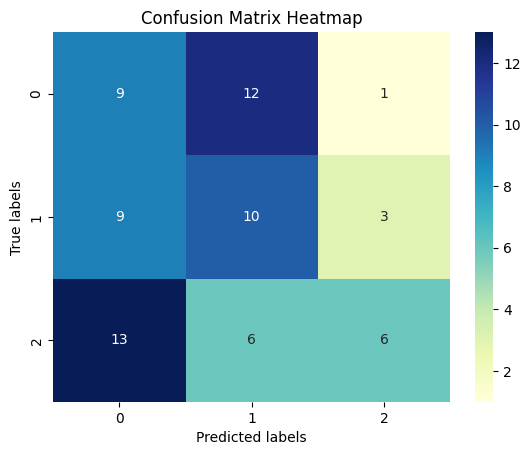

In [72]:
# Compute the confusion matrix
sns.heatmap(cm, annot=True, cmap="YlGnBu")
# Set labels for the axes
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [73]:
sensitivity = recall_score(labels_test, predicted_class_name, average='macro')

# Extract the true negatives (TN) and false positives (FP) for each class
tnr_drusen = np.sum(cm[1:, 1:])
fpr_drusen = np.sum(cm[1:, 0])   
tnr_exudate = np.sum(np.vstack((cm[0, 0], cm[2, 2])))  
fpr_exudate = np.sum(np.hstack((cm[0, 1:], cm[2, :2])))  
tnr_normal = np.sum(cm[:2, :2]) 
fpr_normal = np.sum(np.hstack((cm[:2, 2], cm[2, 0:2]))) 

In [74]:
# Calculate the specificity for each class
spec_drusen = tnr_drusen / (tnr_drusen + fpr_drusen)
spec_exudate = tnr_exudate / (tnr_exudate + fpr_exudate)
spec_normal = tnr_normal / (tnr_normal + fpr_normal)

# Calculate the accuracy score
accuracy = accuracy_score(labels_test, predicted_class_name)

# Calculate the F-score
f_score = f1_score(labels_test, predicted_class_name, average='weighted')

# Calculate the AUC score
y_test = np.reshape(labels_test, (-1, 1))
y_pred = np.reshape(predicted_class_name, (-1, 1))
y_pred = normalize(y_pred, axis=1, norm='l1')
y_test = normalize(y_test, axis=1, norm='l1')

auc_score = roc_auc_score(y_test, y_pred)

print("Sensitivity: "+str(round(sensitivity,ndigits=2)))
print("Specificity for  Drusen: " + str(round(spec_drusen,ndigits=2)))
print("Specificity for  Exudate: "+str(round(spec_exudate,ndigits=2)))
print("Specificity for  Normal: "+str(round(spec_normal,ndigits=2)))
print("Accuracy: "+ str(round(accuracy,ndigits=2)))
print("F-score: "+ str(round(f_score, ndigits=2)))
print("AUC: " + str(round(auc_score, ndigits= 4)))

Sensitivity: 0.37
Specificity for  Drusen: 0.53
Specificity for  Exudate: 0.32
Specificity for  Normal: 0.63
Accuracy: 0.36
F-score: 0.36
AUC: 0.4705
